<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#TO-DO:" data-toc-modified-id="TO-DO:-1">TO-DO:</a></span><ul class="toc-item"><li><span><a href="#Derived" data-toc-modified-id="Derived-1.1">Derived</a></span></li></ul></li><li><span><a href="#Chapter-1---Motivating-Problems-and-Systems" data-toc-modified-id="Chapter-1---Motivating-Problems-and-Systems-2">Chapter 1 - Motivating Problems and Systems</a></span><ul class="toc-item"><li><span><a href="#1.2-Averaging-algorithms-in-wireless-sensor-networks" data-toc-modified-id="1.2-Averaging-algorithms-in-wireless-sensor-networks-2.1">1.2 Averaging algorithms in wireless sensor networks</a></span></li><li><span><a href="#First-Bullet-Header" data-toc-modified-id="First-Bullet-Header-2.2">First Bullet Header</a></span><ul class="toc-item"><li><span><a href="#Create-the-Graph" data-toc-modified-id="Create-the-Graph-2.2.1">Create the Graph</a></span></li><li><span><a href="#Determine-$A_{wsn}$" data-toc-modified-id="Determine-$A_{wsn}$-2.2.2">Determine $A_{wsn}$</a></span></li><li><span><a href="#Simulate-and-visualize-Process" data-toc-modified-id="Simulate-and-visualize-Process-2.2.3">Simulate and visualize Process</a></span></li></ul></li></ul></li></ul></div>

# TO-DO:

- 4 simple dynamics (averaging vs flow, discrete vs continuous time)
- bug dynamics (visualizing motion on circle) in appendix --> - Exersice 1.5 and section 1.6, see existing
- robot dynamics in E1.6 --> Take a look at what Allan did!
- Outsource functions

## Derived

- 1.2 Wireless System Example
- 1.3 continuous-time averaging system: Flocking Dynamics Example
- 1.4
- bug dynamics
- robot dynamics


In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Check package version
# from importlib.metadata import version
# import sys
# print('Your package Versions are displayed below, script might not work if versions do not align, see requirements.txt:')
# print('Python: ', sys.version)
# print('Numpy: ', version('numpy'))
# print('Matplotlib: ', version('matplotlib'))
# print('Networkx: ', version('networkx'))

# Chapter 1 - Motivating Problems and Systems
**TBD** - General Text about what this is, license, interactive etc.

Credits to who

Outsourcing function

## 1.2 Averaging algorithms in wireless sensor networks

Example from Chapter 1.2 for discrete averaging network dynamics with wireless sensor network, enhanced examples will occur in Chapter 4, this is an introductory example. 

Execute next cell to create the example graph.
## First Bullet Header

### Create the Graph

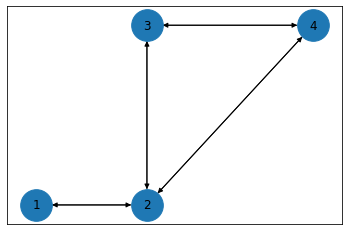

In [2]:
# Creating the Network System example as in Chapter 1.2
G = nx.DiGraph()
G.add_edge(1,2)
G.add_edge(2,1)
G.add_edge(2,3)
G.add_edge(3,2)
G.add_edge(3,4)
G.add_edge(4,3)
G.add_edge(2,4)
G.add_edge(4,2)

pos = {1:[0.2,0.2],2:[.4,.2],3:[.4,.6],4:[.7,.6]}
nx.draw_networkx(G, pos, node_size=1000)

### Determine $A_{wsn}$
The next calculation is the wireless sensor matrix $A_{wsn}$ as the adjacency matrix, plus the identity, row normalized.

In [3]:
# This function calculates explicitly the adjacent matrix of the given undirected graph as row-stochastic averaging matrix 

def get_adj_matrix_undi_avg(G):
    """
    Returns averaging row stochastic matrix A from given graph G
    """
    A = nx.to_numpy_matrix(G) 
    A = A + np.eye(A.shape[0])
    A = A / np.sum(A, 0).T
    return A

A = get_adj_matrix_undi_avg(G)
A

matrix([[0.5       , 0.5       , 0.        , 0.        ],
        [0.25      , 0.25      , 0.25      , 0.25      ],
        [0.        , 0.33333333, 0.33333333, 0.33333333],
        [0.        , 0.33333333, 0.33333333, 0.33333333]])

### Simulate and visualize Process

Note: Discrete-time linear system $x(k+1) = A x(k)$, $x(0)=x_0$ or, equivalently $x(k) = A^k x_0$

We plot our simulation with the initial average as dashed-line

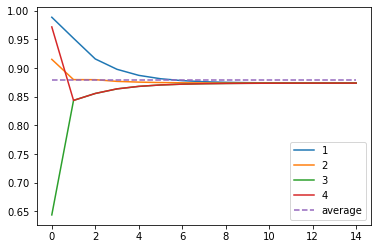

In [4]:
# Initialize random state vector
x_0 = np.random.rand(4)
# Simulating our network and saving the state for each time step
t = 15
def simulate_network(A, x_0, t):
    states = np.zeros((t,A.shape[0]))
    states[0,:]=x_0
    for i in range(1,t):
        states[i,:] = A @ states[i-1,:]
    return states

def plot_all_vals(states, t, legend=True):
    x_axis = np.arange(t)
    for i in range(states.shape[1]):
        plt.plot(x_axis, states[:,i], label=str(i+1))
    average = np.ones(t) * np.sum(x_0)/states.shape[1]
    plt.plot(x_axis, average, '--', label='average')
    if legend:
        plt.legend()

states = simulate_network(A,x_0, t)
plot_all_vals(states, t)

In [39]:
import matplotlib as mpl

def plot_network(i, G, states, pos=None):
    # set nodal values
    #fig, axs= plt.subplots(nrows=2)
    if pos is None:
        pos = nx.drawing.layout.spring_layout(G)
    
    plt.figure(figsize=(8,6))
    colors = states[i]
    cmap = plt.get_cmap('viridis')
    # draw with new color map
    nx.draw_networkx(G, pos, node_size=1000, cmap=cmap,
                     node_color=colors, vmin=0, vmax=1)
    
    norm = mpl.colors.Normalize(vmin=0,vmax=1)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm)
    
    # From here: Add actual state value as label
    pos_higher = {}
    x_off = -0.03  # offset on the y axis
    y_off = 0.015  # offset on the x axis

    for k, v in pos.items():
        pos_higher[k] = (v[0]+x_off, v[1]+y_off)
    labels = ["%.3f" % num for num in states[i]]
    labels = dict(zip(list(range(1, len(labels)+1)), labels))
    nx.draw_networkx_labels(G, pos_higher, labels)
    #return fig

    
def update_network(i, G, states, pos):
    plt.cla() # Clear axes
    colors = states[i]
    cmap = plt.get_cmap('viridis')
    # draw with new color map
    nx.draw_networkx(G, pos, node_size=1000, cmap=cmap,
                     node_color=colors, vmin=0, vmax=1)    
    pos_higher = {}
    x_off = -0.03  # offset on the y axis
    y_off = 0.015  # offset on the x axis

    for k, v in pos.items():
        pos_higher[k] = (v[0]+x_off, v[1]+y_off)
    labels = ["%.3f" % num for num in states[i]]
    labels = dict(zip(list(range(1, len(labels)+1)), labels))
    nx.draw_networkx_labels(G, pos_higher, labels)

<IPython.core.display.Javascript object>


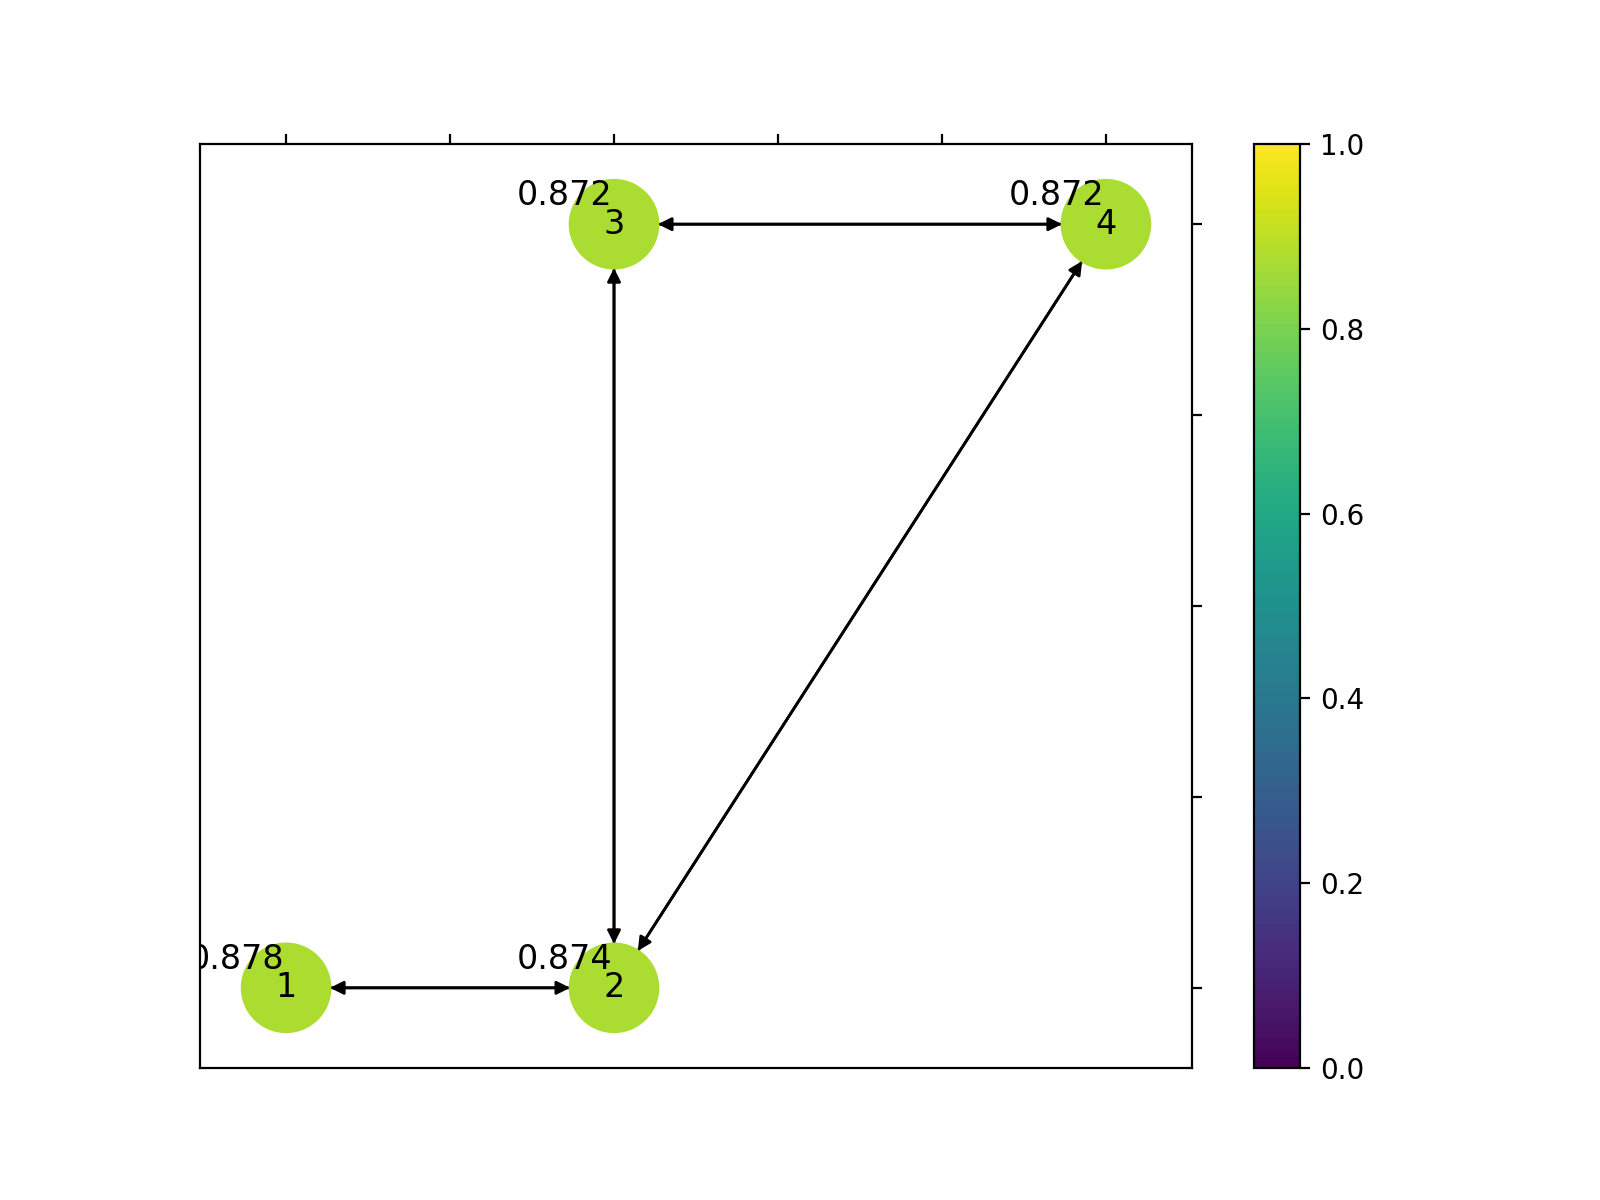

interactive(children=(IntSlider(value=8, description='y', max=15, min=1), Output()), _dom_classes=('widget-int…

In [42]:
# import ipywidgets.interact class, this class will represent a slide bar.
from ipywidgets import interact
# use interact decorator to decorate the function, so the function can receive the slide bar's value with parameter x.
#@interact(x=(0, 100))
# def double_number(x):
#     print("The double of %d is %d." % (x, x*2))'
#%matplotlib notebook
# add another slide bar to this function with the interact decorator.
plot_network(1, G, states, pos=pos)

@interact(y=(1, t))
def square_number(y):
    return update_network(y-1, G, states, pos=pos)